In [1]:
# importing necessry libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
detector_gt = np.loadtxt( 'detector_groundtruth.dat' )
detector_out = np.loadtxt('detector_output.dat')

In [3]:
def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr, tpr]

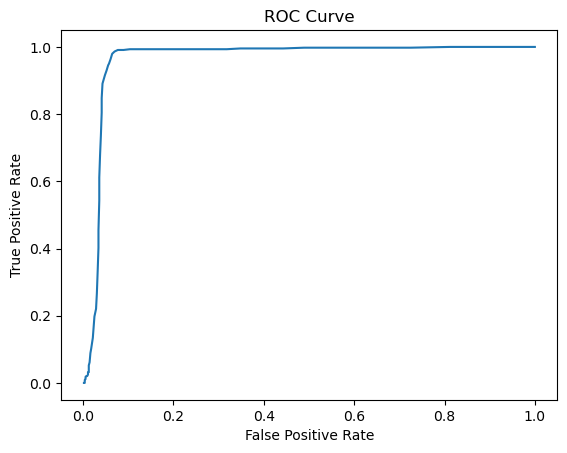

In [4]:
thresholds = np.arange(start=detector_out.min(), stop=detector_out.max(), step = 0.001)
fpr, tpr = roc_curve(1-detector_gt, detector_out, thresholds)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()